In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt

In [5]:
# Load your dataset (replace 'train.csv' with your actual file)
df = pd.read_csv('train.csv')

object_columns = df.select_dtypes(include=['object']).columns

# Use get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=object_columns, drop_first=True)


X = df.drop('price_doc', axis=1)
y = df['price_doc']

In [6]:
# Determine the optimal n_components for PCA using explained variance
pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()


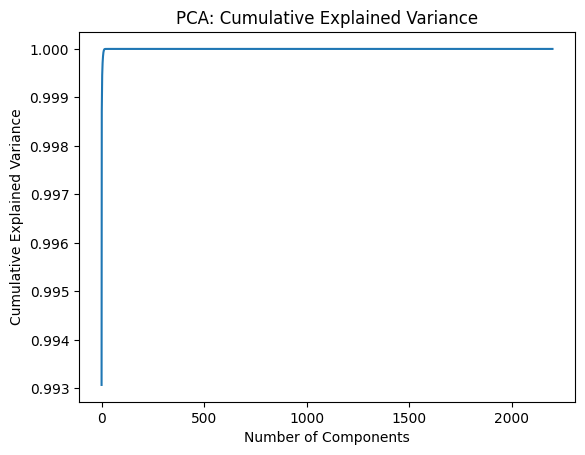

In [7]:
# Plot cumulative explained variance
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.show()

In [8]:
# Choose n_components based on the plot or other criteria
n_components = 10


In [9]:
# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


In [10]:
# Evaluate performance with cross-validation
scores = cross_val_score(LinearRegression(), X_pca, y, cv=5)
print(f'PCA (n_components={n_components}): Mean R^2 score: {scores.mean()}')

# Determine the optimal batch_size for Incremental PCA
batch_sizes = [50, 100, 200, 500]

PCA (n_components=10): Mean R^2 score: 0.5265880238530929


In [11]:
# Iterate over different batch_size values
for batch_size in batch_sizes:
    ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    X_ipca = ipca.fit_transform(X)
    print(f'Incremental PCA (batch_size={batch_size}): Explained variance ratio: {ipca.explained_variance_ratio_.sum()}')

# Choose the optimal batch_size based on the results
optimal_batch_size = 100

Incremental PCA (batch_size=50): Explained variance ratio: 0.9999278882695201


MemoryError: Unable to allocate 2.97 GiB for an array with shape (2199, 181507) and data type float64

In [ ]:
# Apply Incremental PCA with the optimal batch_size
ipca = IncrementalPCA(n_components=n_components, batch_size=optimal_batch_size)
X_ipca = ipca.fit_transform(X)

# Evaluate performance with cross-validation
scores_ipca = cross_val_score(LinearRegression(), X_ipca, y, cv=5)
print(f'Incremental PCA (batch_size={optimal_batch_size}): Mean R^2 score: {scores_ipca.mean()}')